In [238]:
# Importing various libraries 
#1) manipulates data 
import pandas as pd
import numpy as np

# 2) visualizes data
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns



In [6]:
# read in file taken from https://github.com/zonination/emperors/blob/master/emperors.csv
d = pd.read_csv("emperors-master/emperors.csv")

In [7]:
# look at how many rows and columns are in data set
print d.shape

(68, 16)


In [160]:
# preview what data looks like
d.head()

,index,name,name.full,birth,death,birth.cty,birth.prv,rise,reign.start,reign.end,cause,killer,dynasty,era,notes,verif.who
0,1,Augustus,IMPERATOR CAESAR DIVI FILIVS AVGVSTVS,0062-09-23,0014-08-19,Rome,Italia,Birthright,0026-01-16,0014-08-19,Assassination,Wife,Julio-Claudian,Principate,"birth, reign.start are BCE. Assign negative fo...",Reddit user zonination
1,2,Tiberius,TIBERIVS CAESAR DIVI AVGVSTI FILIVS AVGVSTVS,0041-11-16,0037-03-16,Rome,Italia,Birthright,0014-09-18,0037-03-16,Assassination,Other Emperor,Julio-Claudian,Principate,birth is BCE. Assign negative for correct ISO ...,Reddit user zonination
2,3,Caligula,GAIVS IVLIVS CAESAR AVGVSTVS GERMANICVS,0012-08-31,0041-01-24,Antitum,Italia,Birthright,0037-03-18,0041-01-24,Assassination,Senate,Julio-Claudian,Principate,assassination may have only involved the Praet...,Reddit user zonination
3,4,Claudius,TIBERIVS CLAVDIVS CAESAR AVGVSTVS GERMANICVS,0009-08-01,0054-10-13,Lugdunum,Gallia Lugdunensis,Birthright,0041-01-25,0054-10-13,Assassination,Wife,Julio-Claudian,Principate,birth is BCE. Assign negative for correct ISO ...,Reddit user zonination
4,5,Nero,NERO CLAVDIVS CAESAR AVGVSTVS GERMANICVS,0037-12-15,0068-06-09,Antitum,Italia,Birthright,0054-10-13,0068-06-09,Suicide,Senate,Julio-Claudian,Principate,NaN,Reddit user zonination


In [403]:
# create subset of data with columns to look at
df = d[['name', 'birth', 'death', 'rise', 'reign.start', 'reign.end', 'cause', 'killer', 'notes']].copy()

# convert series to data frame and rename columns 
df = pd.DataFrame(df)
df = df.rename(index=str, columns={"reign.start": "reign_start", "reign.end": "reign_end"})

In [208]:
# Count distinct categorical variables for rise
df.rise.value_counts()

Birthright                         35
Seized Power                       10
Appointment by Senate               7
Appointment by Army                 7
Appointment by Emperor              4
Appointment by Praetorian Guard     3
Election                            1
Purchase                            1
dtype: int64

In [221]:
# Combine variables 
df['new_rise'] = np.where(df['rise'].str.contains('Appointment'), 'appointment', 
                          (np.where(df['rise'].str.contains('Birthright'), 'birthright', 
                                   (np.where(df['rise'].str.contains('Seized'), 'seized_power', 'other')))))

In [223]:
# Count distinct categorical variables for new rise categories
df.new_rise.value_counts()

birthright      35
appointment     21
seized_power    10
other            2
dtype: int64

In [224]:
# Count distinct categorical variables for cause
df.cause.value_counts()

Assassination     25
Natural Causes    21
Execution          8
Suicide            5
Died in Battle     5
Unknown            3
Captivity          1
dtype: int64

In [225]:
# Count distinct categorical variables for killer
df.killer.value_counts()

Other Emperor       18
Disease             16
Praetorian Guard     7
Opposing Army        6
Own Army             5
Unknown              5
Senate               3
Wife                 2
Fire                 1
Court Officials      1
Heart Failure        1
Lightning            1
Aneurism             1
Usurper              1
dtype: int64

In [233]:
# Combine variables 
df['new_killer'] = np.where(df['killer'].str.contains('Heart Failure'), 'disease', 
                          (np.where(df['killer'].str.contains('Aneurism'), 'disease', 
                                   (np.where(df['killer'].str.contains('Fire'), 'natural_disaster', 
                                             (np.where(df['killer'].str.contains('Lightning'), 'natural_disaster', 
                                                       (np.where(df['killer'].str.contains('Disease'), 'disease', 
                                                                 (np.where(df['killer'].str.contains('Court Officials'), 'gov_officials', 
                                                                      (np.where(df['killer'].str.contains('Senate'), 'gov_officials',
                                                                            (np.where(df['killer'].str.contains('Own Army'), 'military', 
                                                                                      (np.where(df['killer'].str.contains('Praetorian '), 'military', 
                                                                                      df['killer'])))))))))))))))))



In [240]:
# setting up to create visualizations
%matplotlib inline
sns.set(style="whitegrid", color_codes=True)
np.random.seed(sum(map(ord, "categorical")))

In [266]:
# specify size of figure
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [321]:
# choosing style for visualizations
plt.style.use('fivethirtyeight')

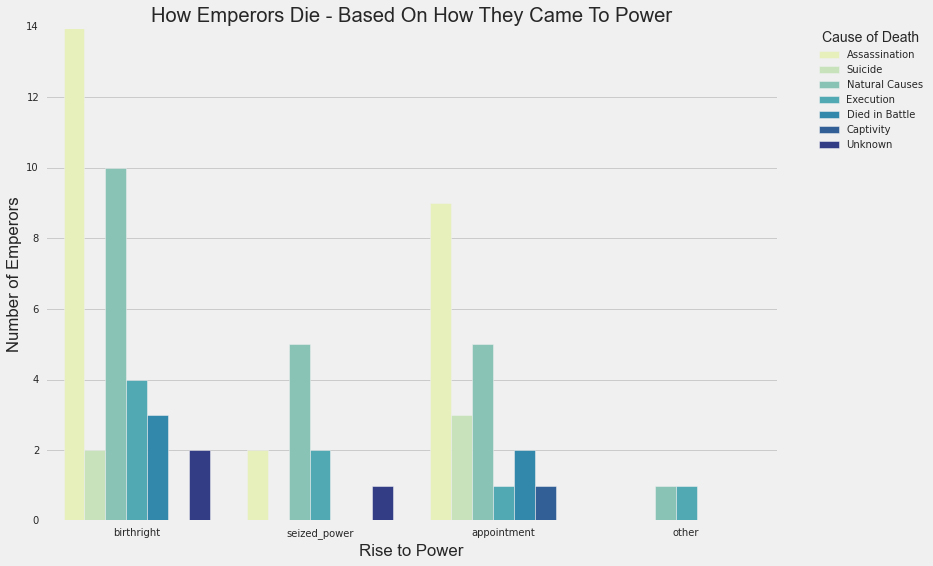

In [376]:
# Vizualization 1 - Looking at the number of emperors by rise to power and cause of death
g = sns.countplot(x="new_rise",
                  hue="cause", 
                  data=df, 
                  palette = 'YlGnBu')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title = 'Cause of Death')
g.set(xlabel='Rise to Power', ylabel='Number of Emperors')
g.set_title("How Emperors Die - Based On How They Came To Power")

In [329]:
# Creating subset of data to calculate percentages
df_pct = df[['new_rise', 'new_killer', 'cause']].copy()

In [335]:
# Gettiing total number of rows to divide by
total=df_pct.shape[0]
total

68

In [377]:
# Count by rise to power and cause
n_df = df_pct.groupby(['new_rise', 'cause']).size().unstack()
n_df = n_df.fillna(0)
n_df



cause,Assassination,Captivity,Died in Battle,Execution,Natural Causes,Suicide,Unknown
new_rise,,,,,,,
appointment,9,1,2,1,5,3,0
birthright,14,0,3,4,10,2,2
other,0,0,0,1,1,0,0
seized_power,2,0,0,2,5,0,1


In [401]:
# % by rise to power and cause
n_df_p = n_df.div(total, axis='index')
n_df_p = n_df_p.fillna(0)

# renaming columns for visualization
n_df_p = n_df_p.rename({'appointment': 'Appointment' , 
               'birthright': 'Birthright', 
              'other' : 'Other', 
              'seized_power' : 'Seized Power'}, axis='index')

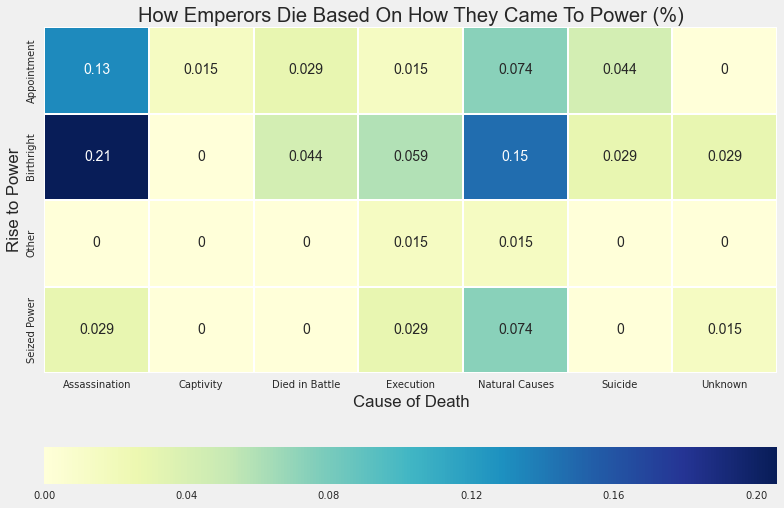

In [402]:
# visualize heatmap of two categorical values (%)
h = sns.heatmap(n_df_p, 
            annot=True, 
            linewidths=.5, 
            cmap="YlGnBu", 
            cbar_kws={"orientation": "horizontal"})
h.set(xlabel='Cause of Death', ylabel='Rise to Power')
h.set_title("How Emperors Die Based On How They Came To Power (%)")
